<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Feature-extraction-with-Shap/LSTM_Shap-values_samples%20ranked%20by%20LI%20%26%20Shap%20Sum-Average_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('Shap values-SUM sorted_LSTM_LI.csv')

In [22]:
# Display all data
dataset.head(56)

,2310001H17Rik,Kdm7a,Mtpap,Ets1 -T,Tvp23b,Ttc3,Wdr43,Ptcd3,Pld4,Rars2,Dapp1,Chchd7,Ets1 - B,Mapk9,Ddx50,Tnfaip3,Brox,Tcrg-C4,Rasa1,Gnas,Bin1,Umps,Zfp639,Ms4a6b,Stk38,Wac,Celf2,Setdb2,Usp15
0,-0.055600,-0.02690,-0.01560,-0.017500,-0.011800,-0.003630,0.008280,-0.005760,-0.000426,-0.002420,-0.002690,-0.010800,-0.002020,-0.001750,0.000635,0.002260,0.000720,-0.001470,-2.670000e-04,0.000331,0.000547,0.001780,0.006520,0.002020,-0.000162,0.008480,0.012600,0.027400,0.031800
1,-0.045500,0.00271,-0.02200,0.000975,0.002210,-0.005280,-0.000959,0.001020,0.000116,-0.004250,0.001350,0.015200,-0.001740,0.000292,-0.000206,0.002080,0.001890,-0.001380,-8.500000e-05,-0.000009,-0.001150,-0.000609,0.005090,-0.001410,-0.002150,-0.002410,-0.001850,-0.012800,0.001310
2,-0.036200,-0.02580,-0.02190,0.003290,0.002230,-0.001570,0.011200,0.001000,-0.000132,0.001850,0.001330,-0.004840,-0.000796,0.000326,0.000601,0.002070,0.001910,-0.001380,-2.050000e-04,-0.000497,-0.001140,-0.000663,-0.006130,-0.000656,0.000116,0.000351,-0.001890,0.007720,-0.002500
3,-0.030700,0.05060,0.07660,0.000369,-0.000096,-0.034400,-0.037800,0.000780,-0.009450,-0.012900,-0.011700,0.038200,0.010500,-0.000254,-0.004140,-0.007290,-0.007690,-0.001690,6.940000e-04,0.000965,0.005080,0.000090,0.005850,-0.001620,0.015200,-0.002960,-0.002450,-0.015500,-0.009030
4,-0.032200,0.05340,0.08080,-0.000593,-0.001460,-0.036200,-0.039800,-0.000296,-0.009680,-0.013700,-0.011900,0.040400,0.011300,-0.000005,-0.004370,-0.007700,-0.008250,-0.000007,7.070000e-04,0.000916,0.005320,-0.000514,0.004450,-0.000528,0.015800,-0.003160,-0.001240,0.011400,-0.009570
5,0.013600,-0.02650,-0.02260,-0.005110,-0.005980,0.005810,-0.019800,-0.001460,0.000656,0.001900,-0.000159,0.015700,0.000776,0.000105,0.000622,-0.001460,0.001980,0.001370,-2.260000e-04,0.000373,-0.001180,-0.000751,0.005770,0.000577,-0.002180,-0.001620,-0.001970,-0.013100,-0.003900
6,-0.004430,-0.02680,-0.02280,-0.003800,0.002310,0.005910,-0.022800,-0.002290,0.000641,0.001950,-0.000720,0.015800,0.001440,0.000016,-0.001460,0.002160,-0.001800,0.003050,3.020000e-04,-0.000469,0.002180,0.000073,-0.006400,0.001580,0.005830,-0.000553,-0.001310,-0.002370,0.000488
7,0.015000,0.02350,-0.02440,-0.000603,0.002510,-0.022500,0.002810,0.000384,0.000666,0.002160,0.000901,0.002630,0.000667,0.000067,0.000083,-0.002650,0.002250,-0.001600,8.700000e-05,-0.000375,0.000145,0.000182,-0.006780,-0.000472,-0.000952,-0.000978,-0.001310,-0.004540,-0.004800
8,-0.006340,-0.01190,-0.02310,-0.002090,0.002340,0.000687,-0.011300,-0.000789,0.000657,0.001990,-0.000856,0.004700,0.000429,0.000407,0.000127,0.002190,-0.001840,-0.001490,-2.000000e-04,-0.000460,-0.001220,-0.000092,0.003370,0.000318,0.000545,0.000658,-0.002050,0.003070,-0.003200
9,-0.057800,-0.02780,-0.01840,-0.018200,-0.012200,0.003850,0.011600,-0.005690,-0.000524,0.002060,-0.000971,-0.002130,-0.002650,-0.002130,0.000648,0.002300,-0.000068,-0.001550,-2.700000e-04,-0.000345,-0.001320,0.002230,0.006630,0.001880,-0.001530,0.008150,0.013600,0.028400,0.033300


In [23]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,2310001H17Rik,Kdm7a,Mtpap,Ets1 -T,Tvp23b,Ttc3,Wdr43,Ptcd3,Pld4,Rars2,Dapp1,Chchd7,Ets1 - B,Mapk9,Ddx50,Tnfaip3,Brox,Tcrg-C4,Rasa1,Gnas,Bin1,Umps,Zfp639,Ms4a6b,Stk38,Wac,Celf2,Setdb2,Usp15
count,56.000000,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000
mean,-0.000007,0.000003,0.000002,-0.000001,2.446429e-07,-4.956353e-19,8.214286e-07,2.500000e-07,1.982143e-07,-1.303571e-07,-3.571429e-09,-0.000002,6.875000e-07,9.428571e-08,2.000000e-07,2.535714e-07,1.607143e-07,4.107143e-09,8.689286e-08,2.535714e-08,-2.678571e-07,1.582143e-07,-1.607143e-07,-1.160714e-07,2.446429e-07,3.589286e-07,9.642857e-07,7.321429e-07,0.000002
std,0.030179,0.023119,0.026522,0.007618,5.446381e-03,9.496353e-03,1.330805e-02,2.428862e-03,2.144101e-03,3.583937e-03,2.757611e-03,0.012648,3.147701e-03,8.051563e-04,1.071682e-03,2.828109e-03,2.424804e-03,2.129044e-03,2.670659e-04,4.153256e-04,1.587225e-03,9.601229e-04,5.537112e-03,1.308562e-03,3.680631e-03,3.702347e-03,5.408511e-03,1.487499e-02,0.013471
min,-0.062900,-0.027900,-0.024800,-0.019800,-1.330000e-02,-3.620000e-02,-3.980000e-02,-6.100000e-03,-9.680000e-03,-1.370000e-02,-1.190000e-02,-0.018200,-3.200000e-03,-2.360000e-03,-4.370000e-03,-7.700000e-03,-8.250000e-03,-1.700000e-03,-3.260000e-04,-6.240000e-04,-1.400000e-03,-1.330000e-03,-6.850000e-03,-1.860000e-03,-2.740000e-03,-3.790000e-03,-4.360000e-03,-1.660000e-02,-0.013300
25%,-0.026475,-0.025725,-0.019275,-0.001902,-1.325000e-03,-2.027500e-03,-8.720000e-03,-8.045000e-04,-4.392500e-04,-1.212500e-03,-7.050000e-04,-0.007970,-1.962500e-03,-5.410000e-05,-2.597500e-04,-1.820000e-03,-1.195000e-03,-1.402500e-03,-1.622500e-04,-3.630000e-04,-1.132500e-03,-6.232500e-04,-6.122500e-03,-1.362500e-03,-2.157500e-03,-2.325000e-03,-3.230000e-03,-1.370000e-02,-0.008130
50%,0.010200,0.000900,-0.012800,0.001405,2.305000e-03,2.655000e-03,4.950000e-03,6.545000e-04,5.985000e-04,1.875000e-03,7.320000e-04,-0.002250,-1.100000e-03,3.090000e-04,3.250000e-04,1.915000e-03,3.895000e-04,-1.230000e-03,-6.100000e-05,-7.595000e-05,-6.475000e-04,-3.350000e-04,3.050000e-03,7.175000e-05,-9.610000e-04,-1.155000e-03,-1.950000e-03,-1.369000e-03,-0.004550
75%,0.026900,0.015950,0.013400,0.005352,4.252500e-03,6.240000e-03,1.130000e-02,2.087500e-03,1.232500e-03,2.222500e-03,1.460000e-03,0.005490,1.245000e-03,4.870000e-04,6.552500e-04,2.140000e-03,1.895000e-03,1.557500e-03,5.125000e-05,3.272500e-04,5.522500e-04,1.905000e-04,5.095000e-03,1.005000e-03,4.625000e-04,3.587500e-04,-9.327500e-04,9.735000e-03,0.000915
max,0.032800,0.053400,0.080800,0.008790,5.080000e-03,7.970000e-03,1.380000e-02,2.420000e-03,1.550000e-03,2.780000e-03,2.100000e-03,0.040400,1.130000e-02,9.070000e-04,8.200000e-04,2.370000e-03,2.320000e-03,6.770000e-03,1.220000e-03,9.650000e-04,5.320000e-03,2.510000e-03,7.290000e-03,2.130000e-03,1.580000e-02,9.110000e-03,1.480000e-02,3.110000e-02,0.036400


In [0]:
# Set Seaborn Style defaults
sns.set(style = 'ticks', font= 'sans-serif', font_scale=1.25)

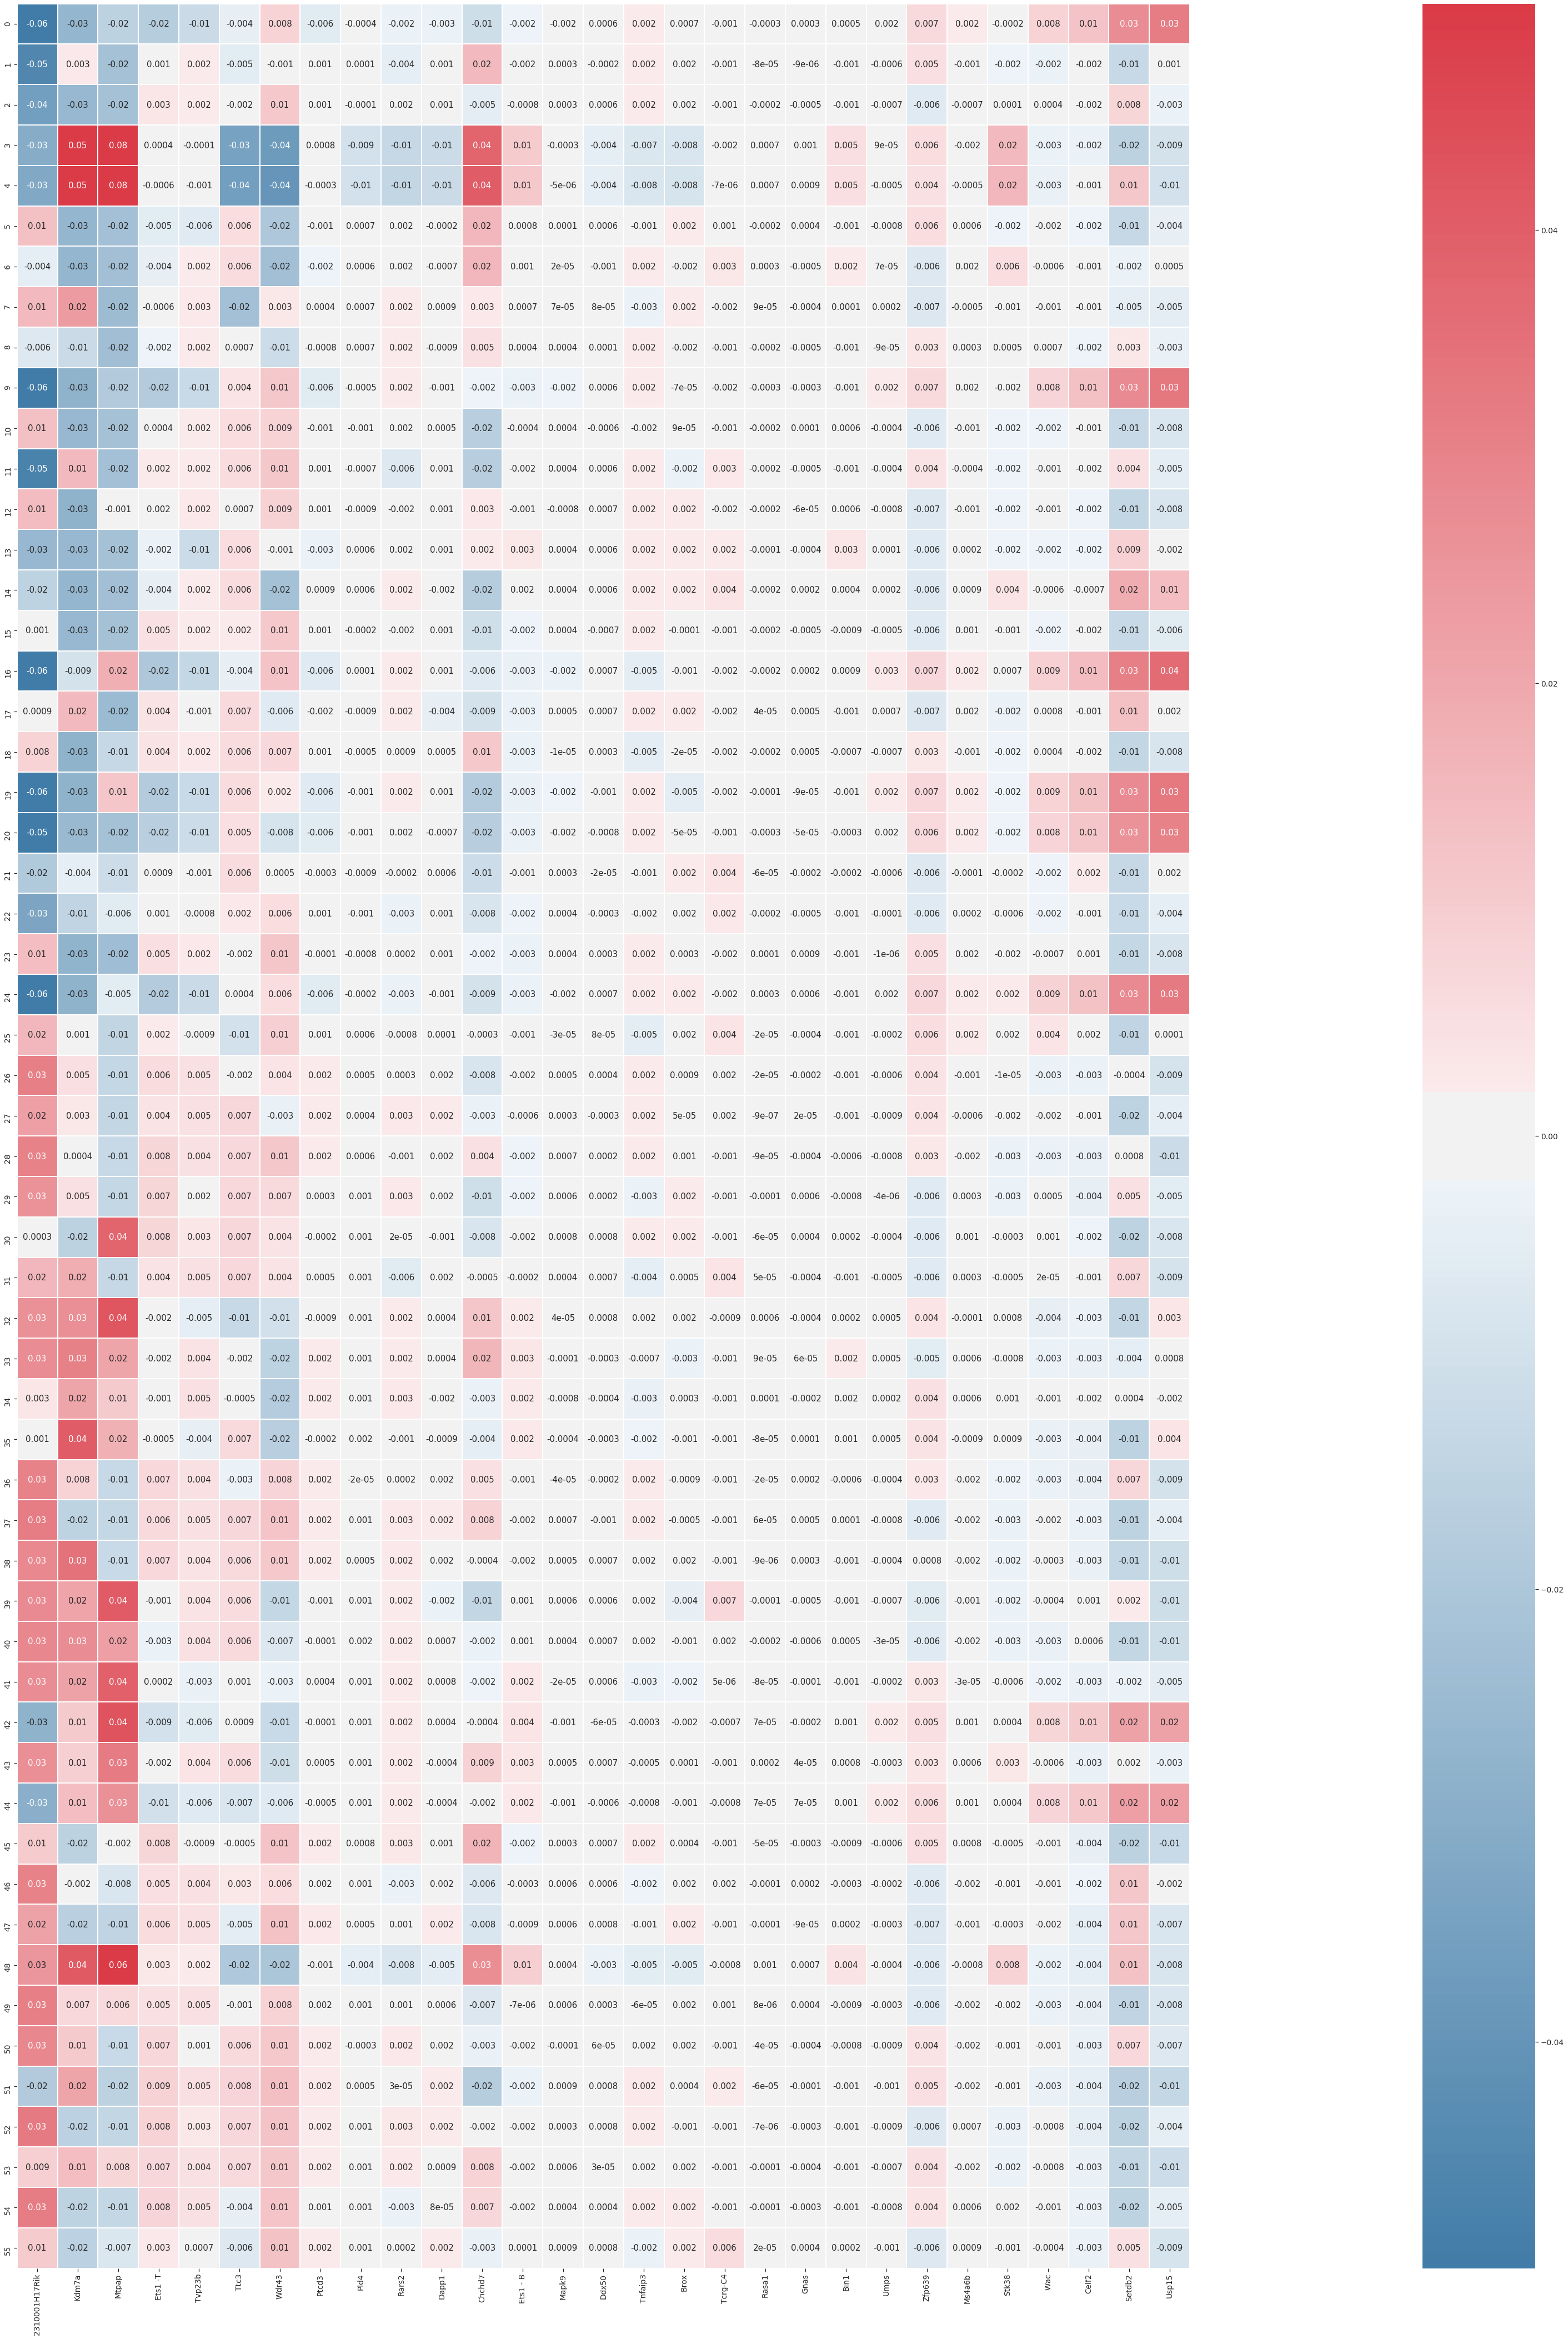

In [25]:
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(150, 75))

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(dataset, linewidths=1, linecolor = 'white', cmap=cmap, center=0, square=True, vmin = -0.05, vmax = 0.05, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_ranked by LI-SHAP SUM.svg', format = 'svg')

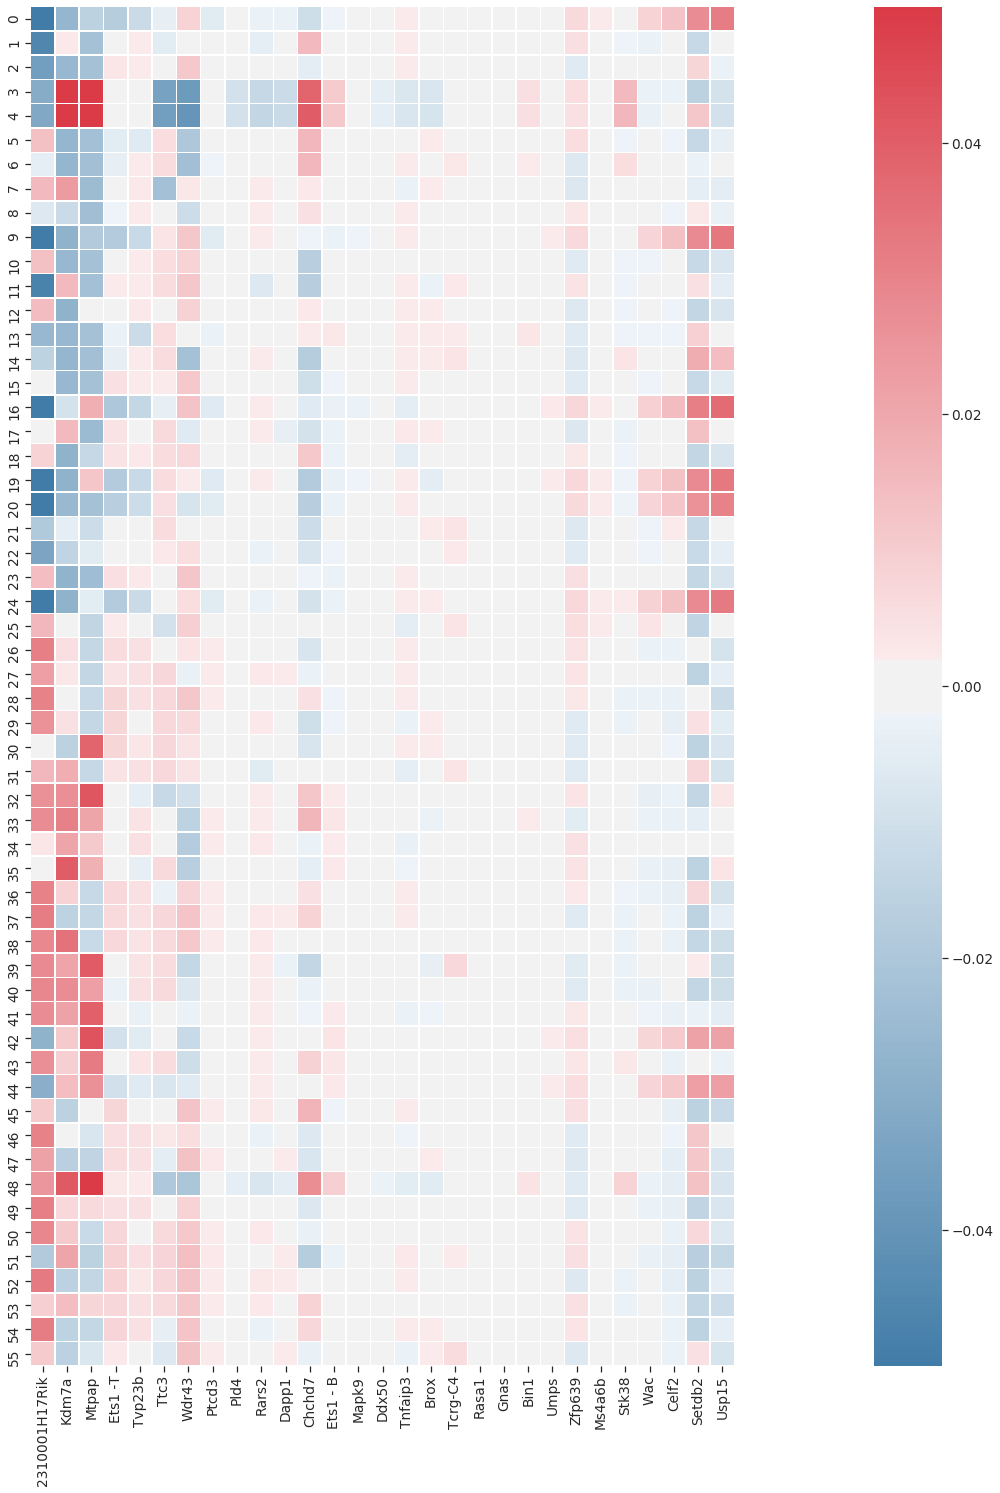

In [26]:
#No annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(dataset, linewidths=0.5, linecolor = 'white', cmap=cmap, center=0, vmin = -0.05, vmax = 0.05, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_ranked by LI-SHAP SUM_no annot.svg', format = 'svg')

In [0]:
# Load learning Index data
data = pd.read_csv('Shap values_LSTM - LI-only.csv')

In [28]:
# Display learner Index data
data.head(56)

,Learning Index
0,-2.8
1,-2.2
2,-2.2
3,-2.2
4,-2.2
5,-1.0
6,-1.0
7,-0.8
8,-0.8
9,0.0


In [29]:
# Describe the Learner Index data
data.describe()

,Learning Index
count,56.000000
mean,2.600000
std,2.795581
min,-2.800000
25%,0.400000
50%,2.800000
75%,5.400000
max,7.400000


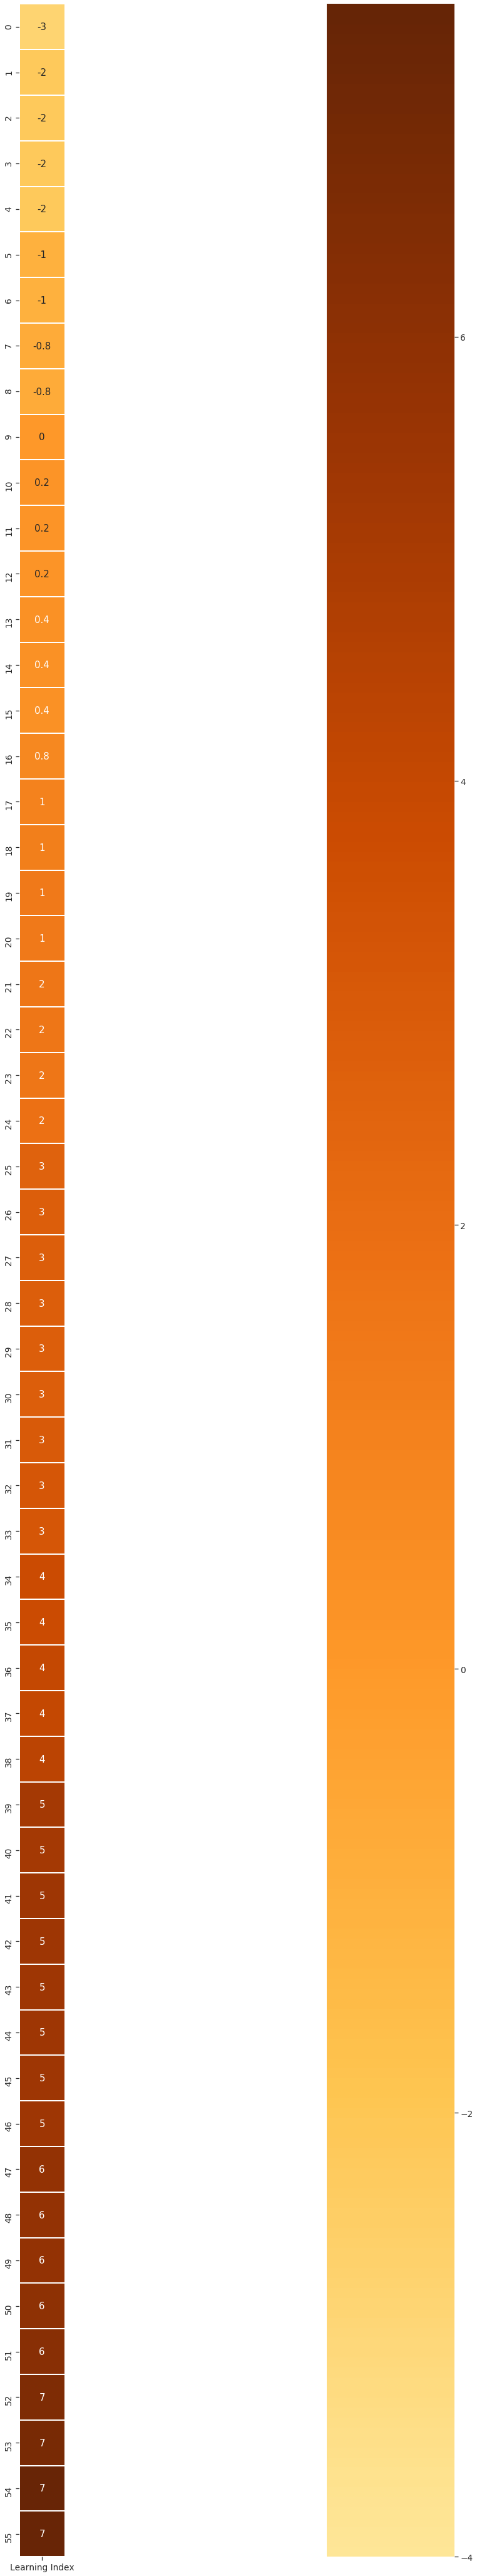

In [30]:
# Plot Learner Index data heatmap separately
# Set up Matplotlib figure
f,ax = plt.subplots(figsize=(150, 75))

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(data, linewidths=1, linecolor = 'white', center=0, square=True, cmap = "YlOrBr", vmin = -4, vmax = 7.5, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_LI-only.svg', format = 'svg')

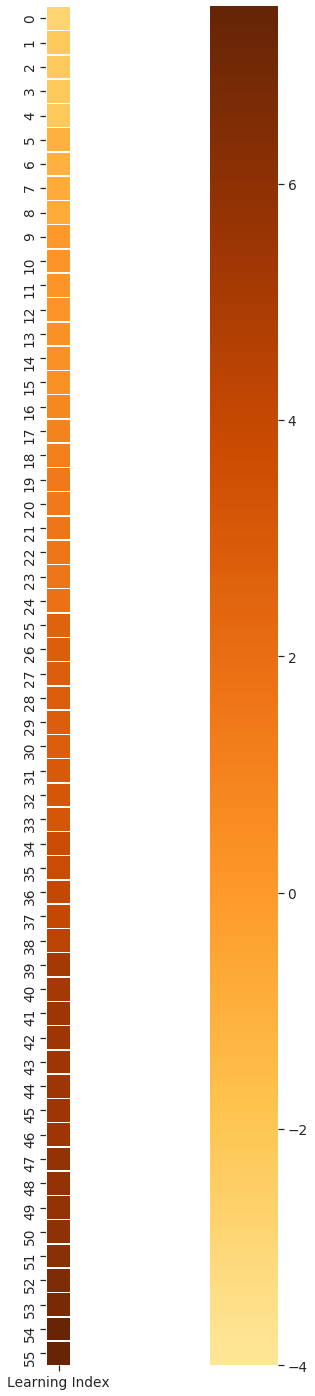

In [31]:
# Plot Learner Index data with no annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(data, linewidths=0.5, linecolor = 'white', center=0, vmin = -4, cmap = "YlOrBr", vmax = 7.5, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_LI-only_no annot.svg', format = 'svg')